In [97]:
#imports
import pandas as pd 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#questionable imports 
%matplotlib inline 
import numpy as np

In [98]:
#get data into python 

#Kp and ap data from 1932
kpdata = pd.read_csv('kp_ap_since_1932.txt', skiprows=29, sep='\s+', header=0, index_col=False)

#Sunspot data from 1818 
sndata = pd.read_csv('SN_d_tot_V2.0.txt', error_bad_lines=False, sep='\s+', header=0, index_col=False, usecols=['YYYY', 'M', 'DD', 'D,FYR', 'SS#', 'SDEV', '#OBS'], na_values=['-1'])

C:\Users\jackb\AppData\Local\Temp\ipykernel_23884\1213534186.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  sndata = pd.read_csv('SN_d_tot_V2.0.txt', error_bad_lines=False, sep='\s+', header=0, index_col=False, usecols=['YYYY', 'M', 'DD', 'D,FYR', 'SS#', 'SDEV', '#OBS'], na_values=['-1'])


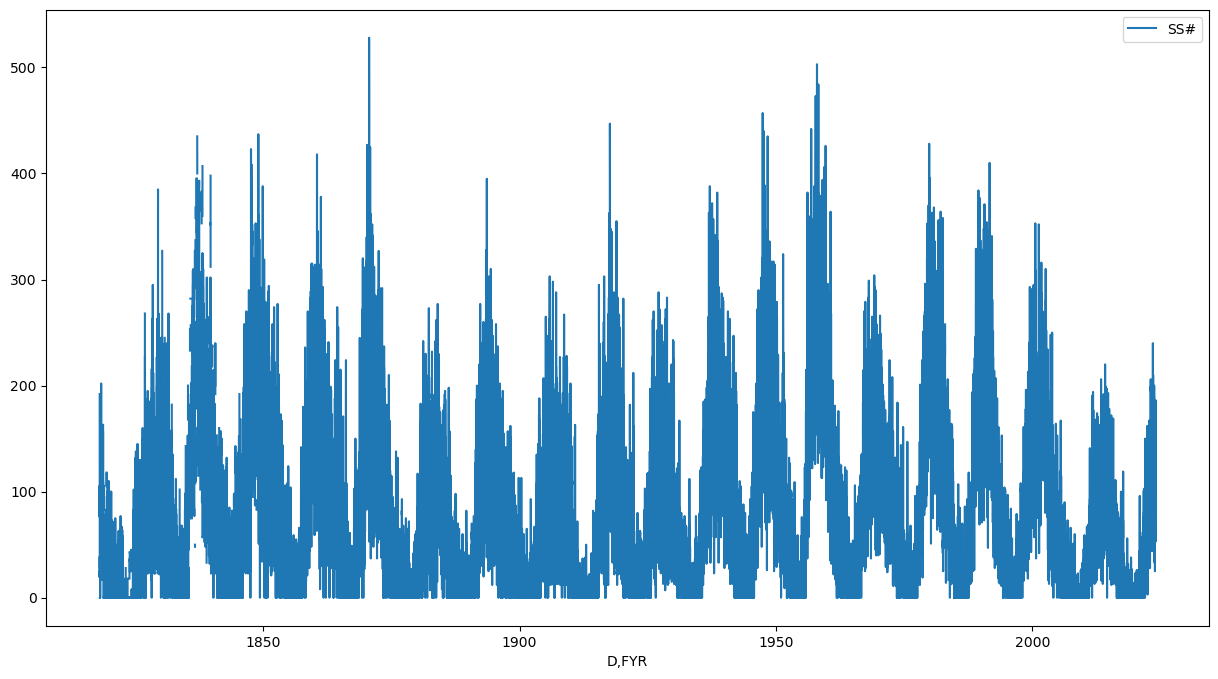

In [99]:
#plot sndata SS# vs D,FYR for visual inspection
sndata.plot(x='D,FYR', y='SS#', kind='line')
legend = ['Sunspot Number']
plt.gcf().set_size_inches(15, 8)

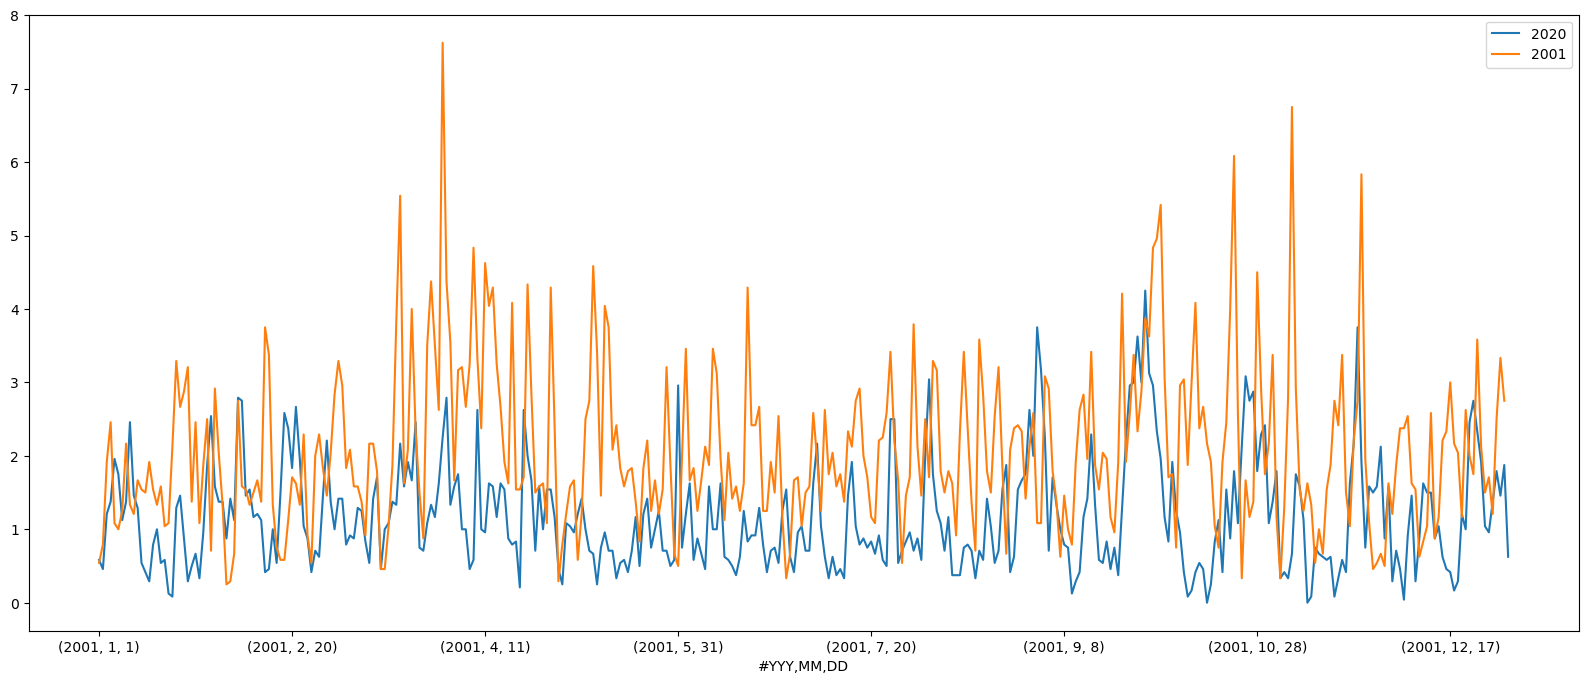

In [100]:
#This block shows that on average in more active years (solar max vs solar min yrs) the Kp index is higher
plt.figure(figsize=(20, 8))

#2020 is a solar min year
year1 = 2020
daily_avgs = kpdata[kpdata['#YYY'] == year1].groupby(['#YYY', 'MM', 'DD']).mean()['Kp']
daily_avgs.plot(label=year1)

#2001 is a solar max year
year2 = 2001
daily_avgs = kpdata[kpdata['#YYY'] == year2].groupby(['#YYY', 'MM', 'DD']).mean()['Kp']
daily_avgs.plot(label=year2)

plt.legend()

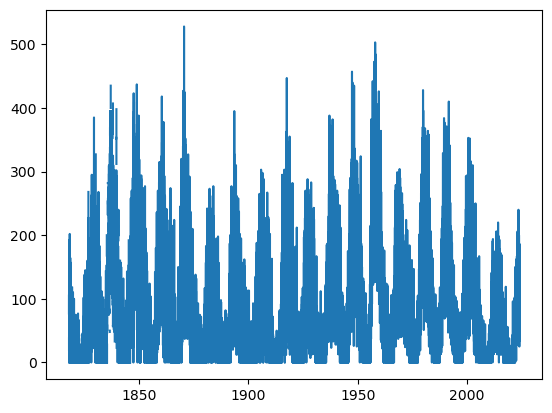

In [101]:
#set index
sndata.index = sndata['D,FYR']

#this block creates the time series for the sunspot data
ts = pd.Series(data=sndata['SS#'], index=sndata['D,FYR'])
plt.plot(ts)

Daily total sunspot number derived by the formula: R= Ns + 10 * Ng, with Ns the number of spots and Ng the number of groups counted over the entire solar disk (The 2-D image of the sun that the viewer is looking at).

In [105]:
#this block splits makes the monthly ts for sarima experimentation

#print first 20 rows of ts
print(ts.head(20))

#interpolate data to fill in NaN(-1) values
ts = ts.interpolate(method='linear', inplace=True)

ts.head(20)

#ts_month = ts.resample('MS').mean()
# ts_month.plot()
# plt.show()

D,FYR
1818.001           NaN
1818.004           NaN
1818.007           NaN
1818.010           NaN
1818.012           NaN
1818.015           NaN
1818.018           NaN
1818.021     65.000000
1818.023     59.400000
1818.026     53.800000
1818.029     48.200000
1818.032     42.600000
1818.034     37.000000
1818.037     47.000000
1818.040     57.000000
1818.042     67.000000
1818.045     77.000000
1818.048     98.000000
1818.051    105.000000
1818.053     91.666667
Name: SS#, dtype: float64


AttributeError: 'NoneType' object has no attribute 'head'

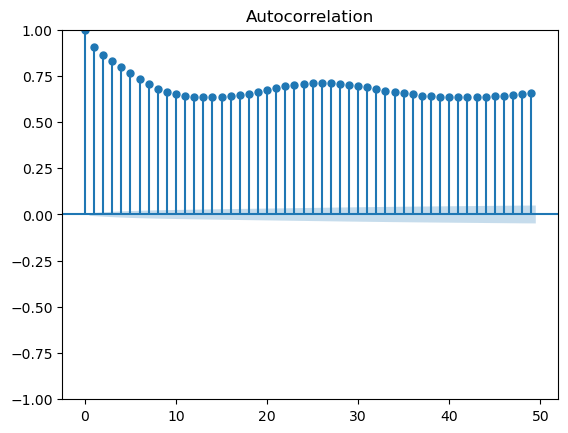

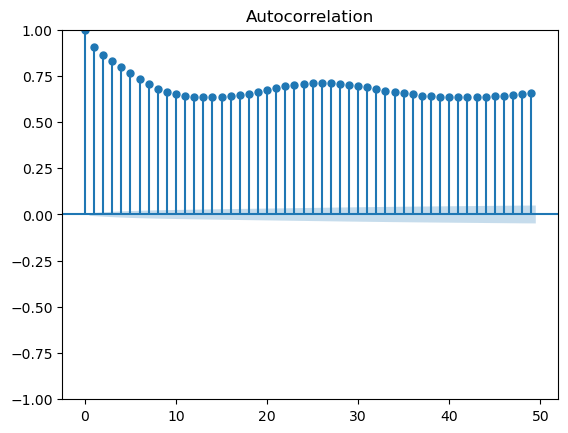

In [26]:
#this block plots information needed for sarimax parameters
plot_acf(sndata['SS#'])

In [6]:
mod = sm.tsa.statespace.SARIMAX(monthly_avgs, order=(3,0,10), seasonal_order=(1, 1, 0, 43))#originally included order, seasonal_order
res = mod.fit(disp=False)
print(res.summary())

NameError: name 'monthly_avgs' is not defined

In [7]:
y = res.predict(start=0,end=75000)
plt.plot(y, alpha=0.5)
#plt.plot(test)
plt.plot(sndata['SS#'],alpha=0.5)
plt.legend(['Predicted', 'Data'])


NameError: name 'res' is not defined